# Obesity Level Analysis


Using obesity levels dataset, from UCI ML repo, to do analysis and come up with cnclusions. 

## Source:

* Fabio Mendoza Palechor, Email: fmendoza1@cuc.edu.co, Celphone: +573182929611
* Alexis de la Hoz Manotas, Email: akdelahoz@gmail.com, Celphone: +573017756983

## Data Set Information:

This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.

## Attribute Information:

Read the article ([https://doi.org/10.1016/j.dib.2019.104344]) to see the description of the attributes.

## Relevant Papers:

1. Palechor, F. M., & de la Hoz Manotas, A. (2019). Dataset for estimation of obesity levels based on eating habits and physical condition in individuals from Colombia, Peru and Mexico. Data in Brief, 104344.
2. De-La-Hoz-Correa, E., Mendoza Palechor, F., De-La-Hoz-Manotas, A., Morales Ortega, R., & SÃ¡nchez HernÃ¡ndez, A. B. (2019). Obesity level estimation software based on decision trees.


## Dataset Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv("/home/trojan/Development/GithubSync/Obesity_Levels_Analysis/dataset/ObesityDataSet_raw_and_data_sinthetic.csv")

## Initial Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [7]:
df.describe() #show statistics of numerical features of the dataset

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df.head(10) #show sample of the dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


From above, we can see that there is no null/duplicate data-points in the dataset. 
Here is the dscribtion of each feature: 
* Gender: binary, male or female
* Age: numeric in years 
* Height: Numeric in meters 
* Weight: numeric, in kilograms 
* Fam_hist: binary, yes or no 
* FAVC: high calory food consumption, binary yes or no 
* FCVC: Veggies comsumption: never =1, sometimes = 2, always = 3
* NCP: number of daily meals: float between 1 - 4 (a few values are not int, need to be conv into int)
* CAEC: food between meals: no, sometimes, frequently, always
* SMOKE: binary, yes/no 
* CH2O: daily water intake in liters, between 1 - 3 (a few values are not int, need to be conv into int)
* SCC: calory monitoring: yes/no 
* FAF: days of physical activity a week: 1-3 (a few values are not int, need to be conv into int)
* TUE: hours a day using technology: 0=0-2hr, 1=3-5hr, 2=>5hr (a few values are not int, need to be conv into int)
* CALC: alcohol intake: no/Sometimes/Frequently/Always
* MTRANS: most used transportation: Public_Transportation/Automobile/Walking/Motorbike/Bike                       
* NObeyesdad: 'Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II' 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II' 'Obesity_Type_III'

## Data Cleanning

For the following features, a small fraction of data-points have non-integer values, which might have been inputed to the dataset by mistake, we will fix this. 
* NCP
* CH2O
* FAF
* TUE

In [25]:
df['NCP'] = round(df['NCP'])
df['CH2O'] = round(df['CH2O'])
df['FAF'] = round(df['FAF'])
df['TUE'] = round(df['TUE'])

Now our dataset is clean, and ready for visualization. 

## Data Analysis & Visualization

Let's first check how correlated are our numerical predectors

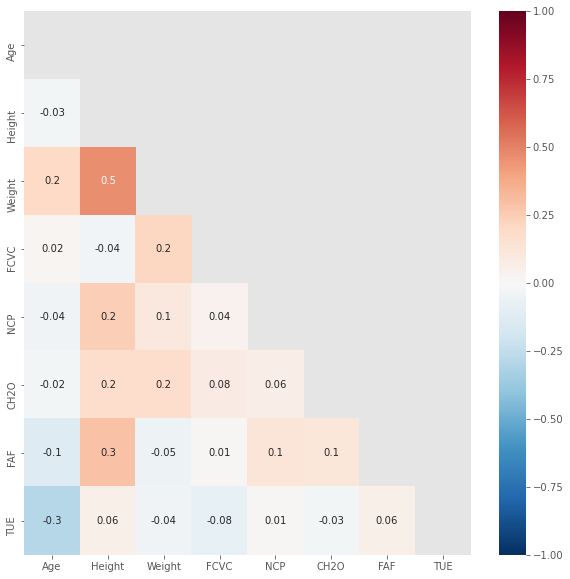

In [28]:
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.1g', vmin=-1, vmax=1, center= 0, mask=matrix, cmap='RdBu_r')
plt.show()

Not much correlation can be seen among those 8 features, except between height and weight, which makes sense. 
Now let's examine the distribution of obesity in the dataset. 

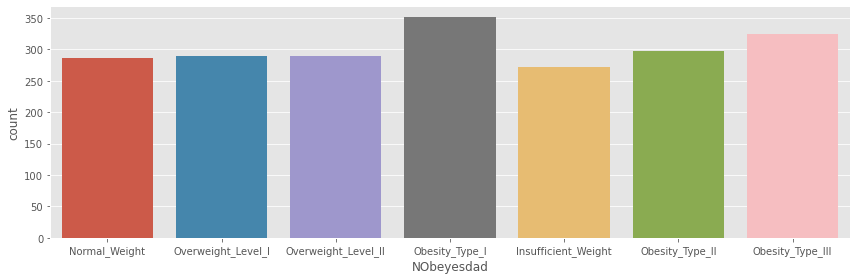

In [30]:
fig = plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='NObeyesdad')
plt.tight_layout()
plt.show()

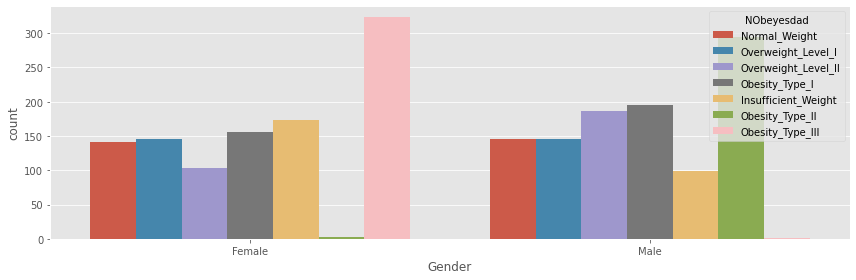

In [33]:
#let's now see how different genders are distributed regarding obesity levels

fig = plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Gender', hue='NObeyesdad')
plt.tight_layout()
plt.show()

An interesting observation is that females have almost zero type ii obesity, and and very large number of type iii, while males have almost no type ii obesity problem. 

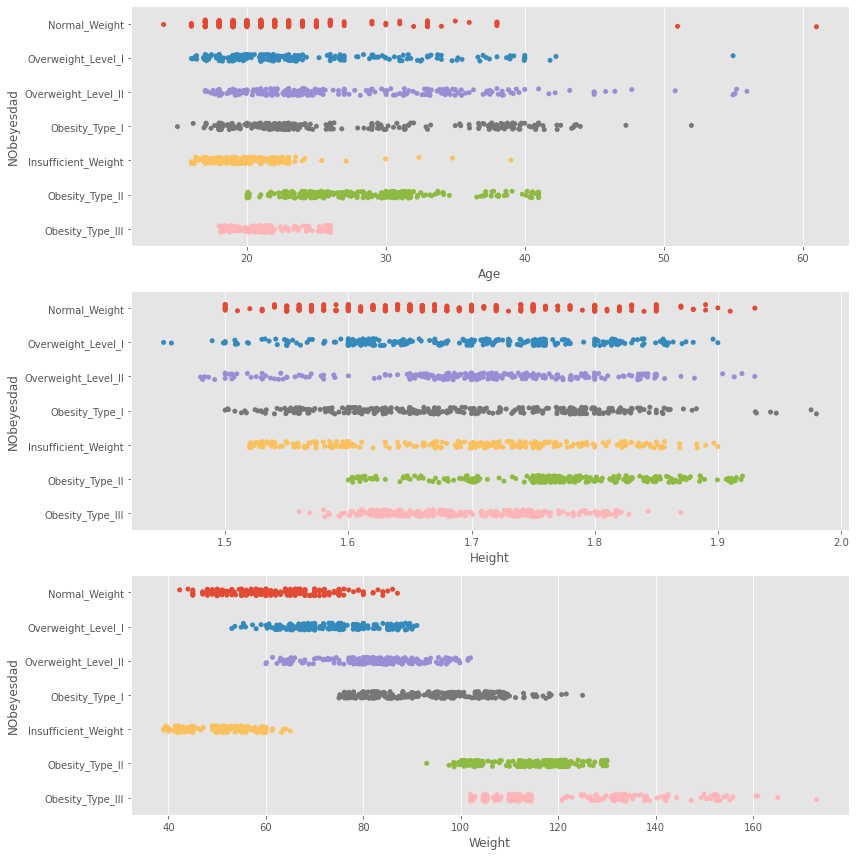

In [41]:
#let's now see how different heights, weights, and ages are distributed regarding obesity levels

fig = plt.figure(figsize=(12, 12))

ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

sns.stripplot(data=df, x='Age', y='NObeyesdad', ax=ax1)
sns.stripplot(data=df, x='Height', y='NObeyesdad', ax=ax2)
sns.stripplot(data=df, x='Weight', y='NObeyesdad', ax=ax3)

plt.tight_layout()
plt.show()